<a href="https://colab.research.google.com/github/dineshsawantdba/MAERSK_Assignment/blob/main/number_plate_blur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install easyocr

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

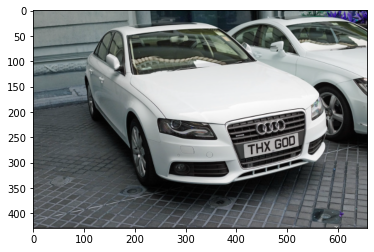

In [ ]:
img = cv2.imread('/content/image3.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

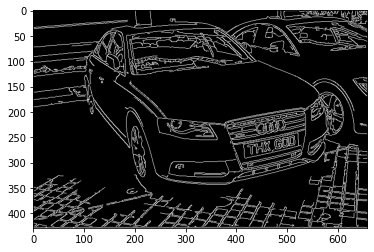

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [ ]:
location

array([[[521, 243]],

       [[520, 268]],

       [[416, 290]],

       [[416, 263]]], dtype=int32)

In [ ]:
location_reshaped=location.reshape(-1)
location_reshaped.shape[0]

8

In [ ]:
x_locations=[]
y_locations=[]
for i in range(location_reshaped.shape[0]):
  if (i%2)==0:
    x_locations.append(location_reshaped[i])
  else:
    y_locations.append(location_reshaped[i])

In [ ]:
#max(x_locations)

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

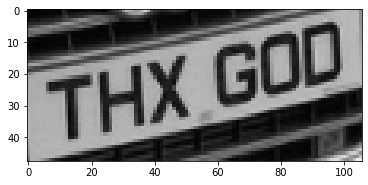

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[53.543071206464106, 7.377528171635387],
   [97.36116774545393, 2.1493550103199004],
   [100.4569287935359, 30.622471828364613],
   [55.63883225454608, 34.8506449896801]],
  'God',
  0.41875619167147404),
 ([[1.280265678430609, 14.388557924704278],
   [58.2863524543657, 9.719673807174823],
   [59.71973432156939, 42.61144207529572],
   [2.713647545634304, 48.28032619282518]],
  'THX',
  0.9638109554873149)]

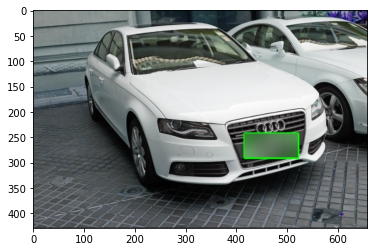

In [ ]:
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
face = res[ min(y_locations):max(y_locations),min(x_locations):max(x_locations)]
# apply gaussian blur to this face
face = cv2.GaussianBlur(face, (101, 101), 0)
# put the blurred face into the original image
res[ min(y_locations):max(y_locations),min(x_locations):max(x_locations)] = face
cv2.imwrite('blurred.jpg', res)
img = cv2.imread('/content/blurred.jpg')
plt.imshow(img)

In [ ]:
#